Mean Absolute Error (MAE): 0.2393
R² Score: 0.4699


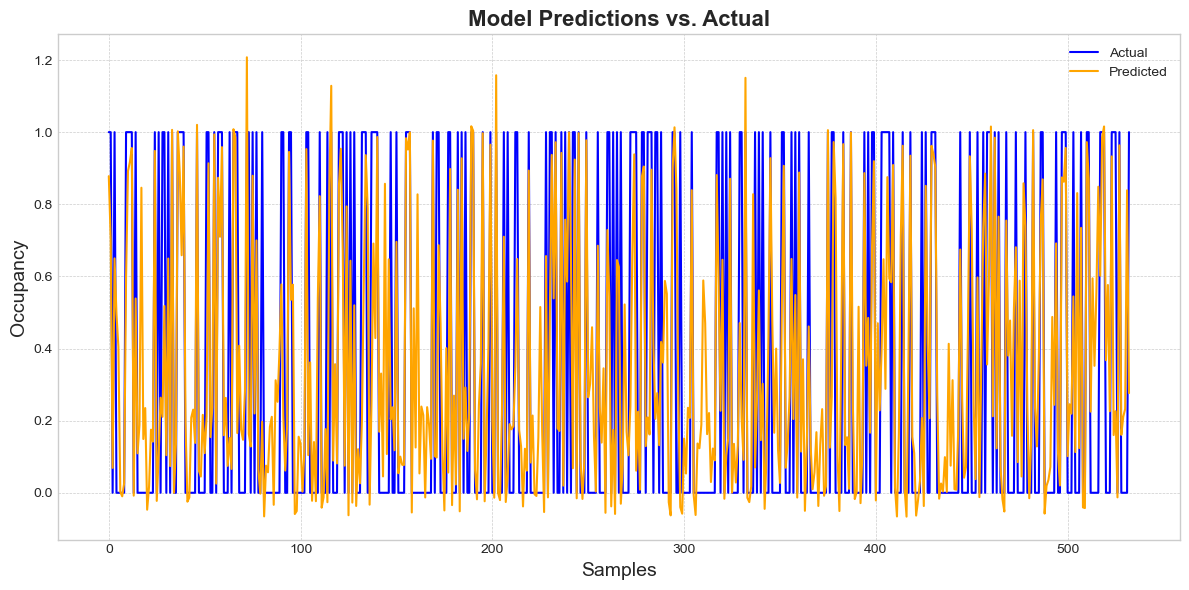

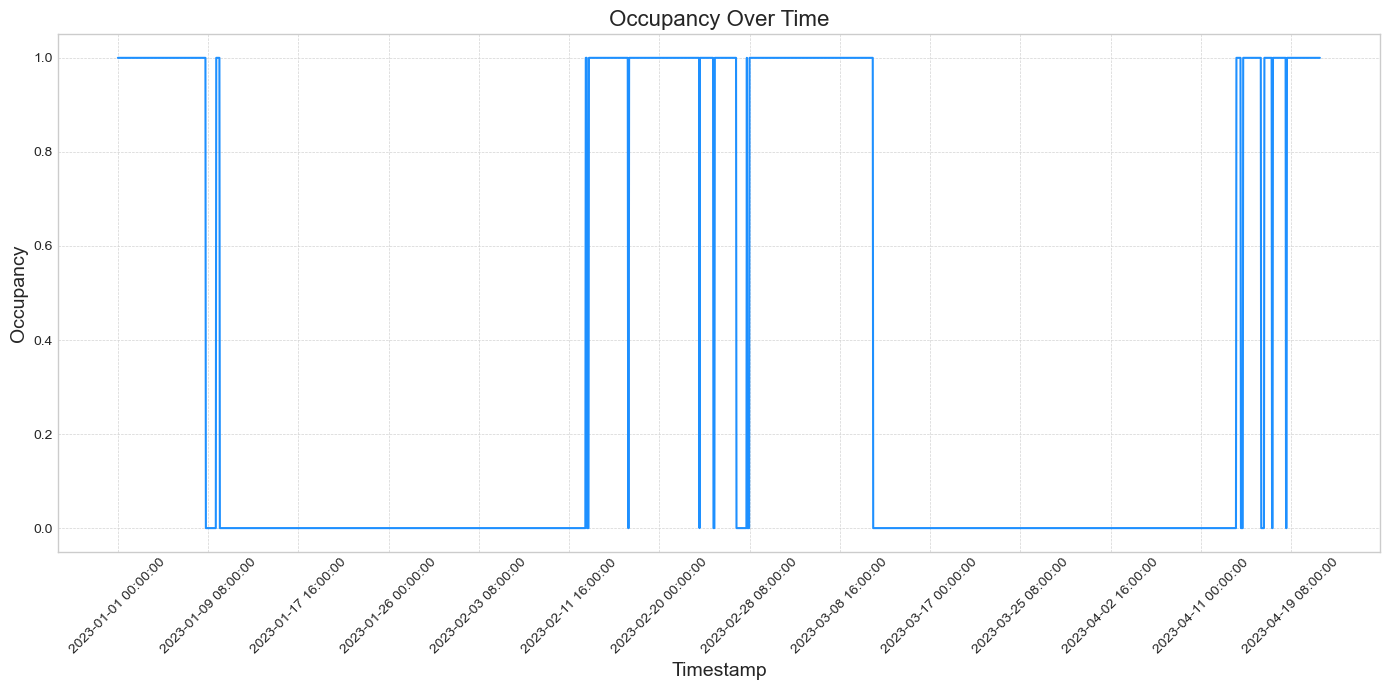

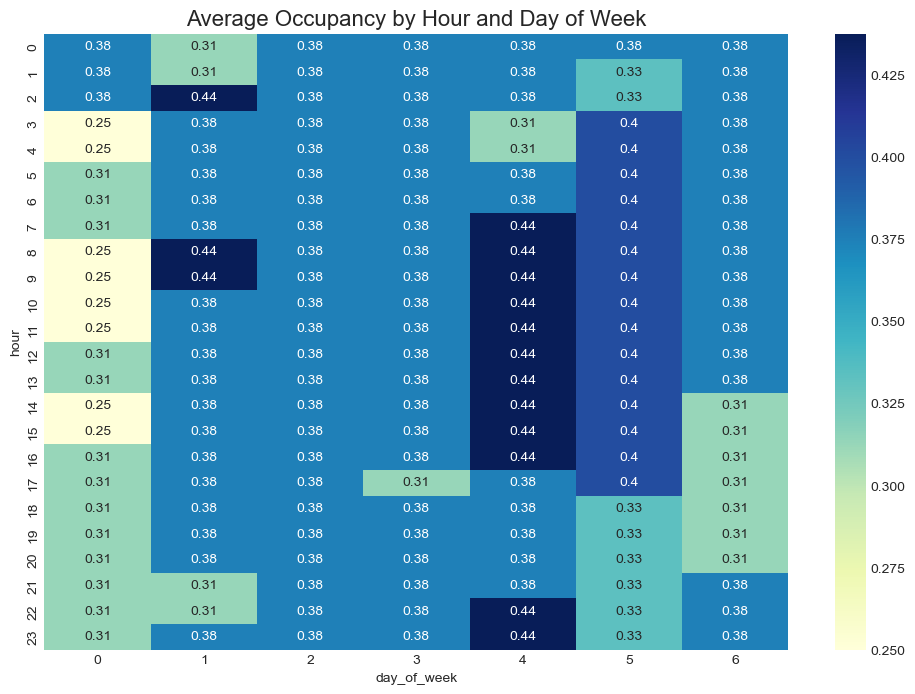

/var/folders/cv/fpmmnx393h101qd8s5fsqrn00000gn/T/ipykernel_58056/4097971260.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_occupancy_by_hour.index, y=avg_occupancy_by_hour.values, ax=axes[1], palette='coolwarm')


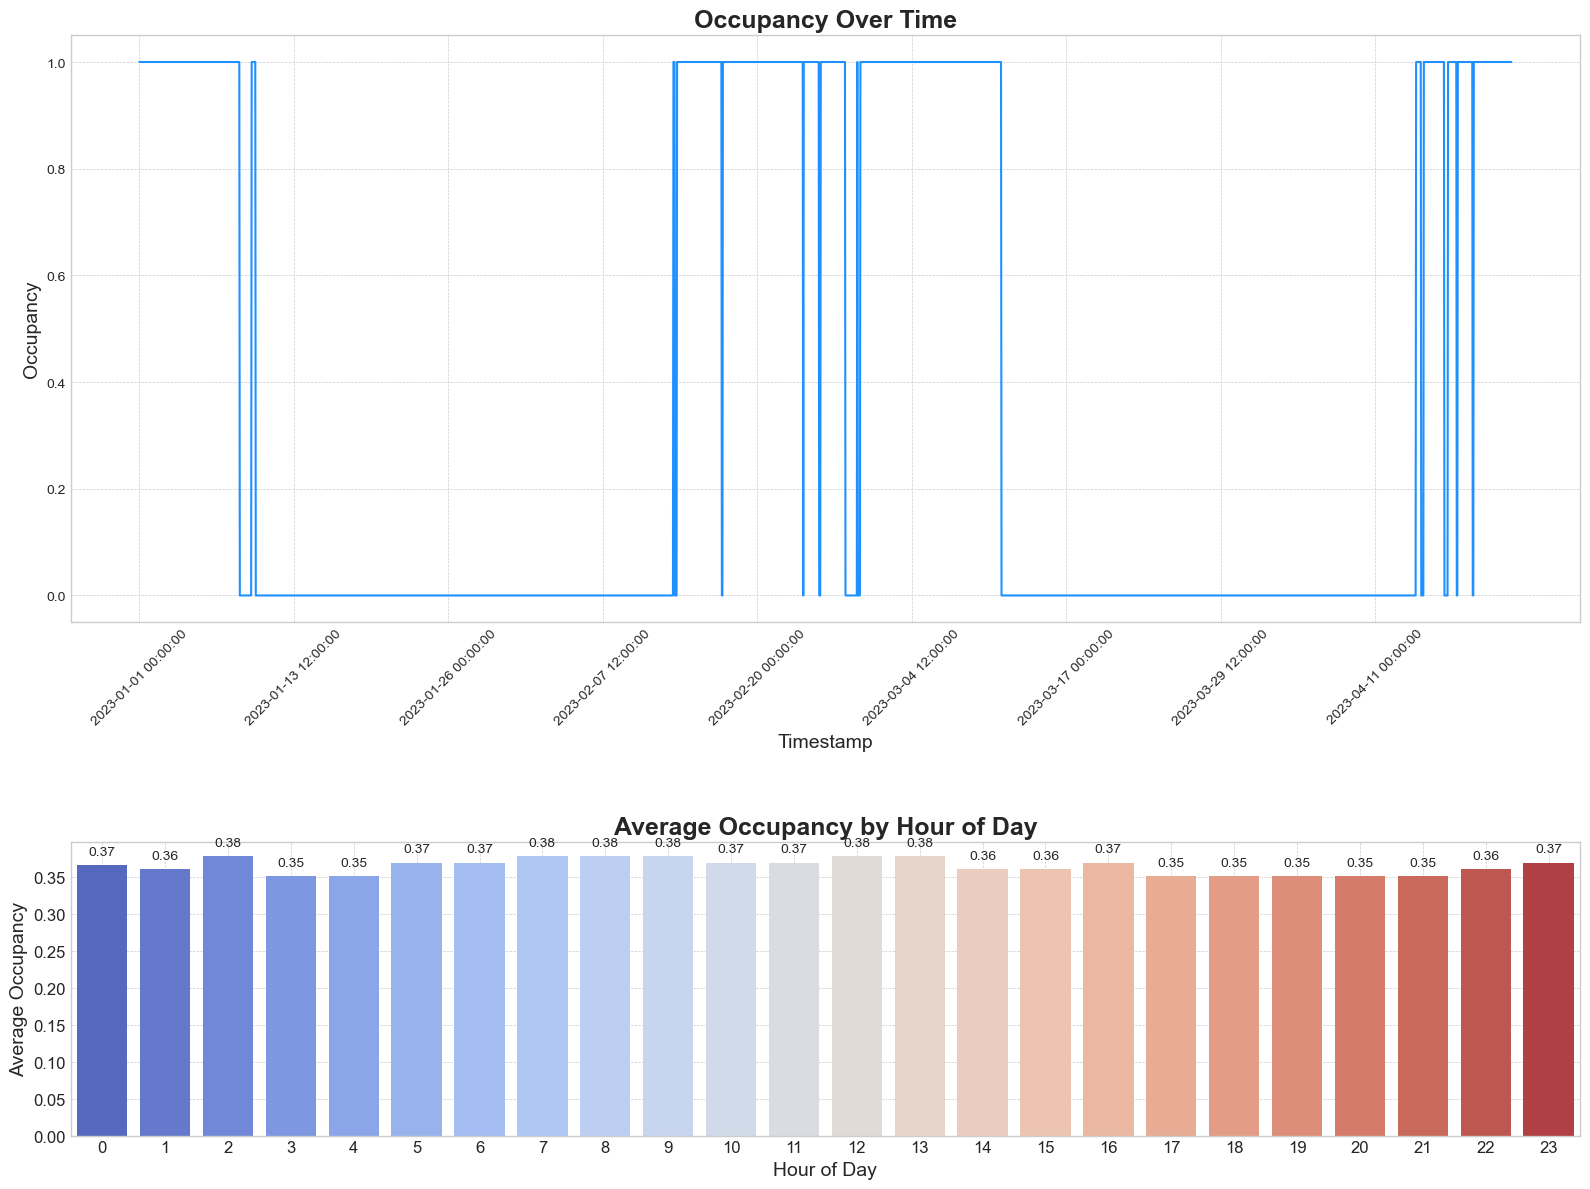

In [35]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the processed dataset
df = pd.read_csv('../data/processed/processed_data.csv')

# Load the saved model
model = joblib.load('../models/occupancy_model.pkl')

# Prepare features and target variable
X = df[['hour', 'day_of_week', 'Temperature', 'Humidity']]
y = df['Occupancy']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualize Model Predictions vs. Actual
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='orange')
plt.title('Model Predictions vs. Actual', fontsize=16, fontweight='bold')
plt.xlabel('Samples', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('../visualizations/model_evaluation.png', bbox_inches='tight')
plt.show()

# Plot Occupancy Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='Occupancy', data=df, color='dodgerblue')
plt.title('Occupancy Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
xticks = df['timestamp'][::200]  # Reduce the number of ticks for readability
plt.xticks(xticks, rotation=45)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.savefig('../visualizations/occupancy_over_time.png', bbox_inches='tight')
plt.show()

# Heatmap for Average Occupancy by Hour and Day of Week
occupancy_pivot = df.pivot_table(index='hour', columns='day_of_week', values='Occupancy', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(occupancy_pivot, cmap='YlGnBu', annot=True)
plt.title('Average Occupancy by Hour and Day of Week', fontsize=16)
plt.savefig('../visualizations/average_occupancy_heatmap.png', bbox_inches='tight')
plt.show()

# Combined Dashboard with Time Series and Bar Chart
fig, axes = plt.subplots(2, 1, figsize=(16, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Time Series
sns.lineplot(x='timestamp', y='Occupancy', data=df, ax=axes[0], color='dodgerblue')
axes[0].set_title('Occupancy Over Time', fontsize=18, weight='bold')
axes[0].set_xlabel('Timestamp', fontsize=14)
axes[0].set_ylabel('Occupancy', fontsize=14)

# Reduce the number of x-ticks for better readability
xticks = df['timestamp'][::300]  # Adjust 300 for fewer ticks
axes[0].set_xticks(xticks)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# Plot 2: Bar Chart for Average Occupancy by Hour
avg_occupancy_by_hour = df.groupby('hour')['Occupancy'].mean()
sns.barplot(x=avg_occupancy_by_hour.index, y=avg_occupancy_by_hour.values, ax=axes[1], palette='coolwarm')
axes[1].set_title('Average Occupancy by Hour of Day', fontsize=18, weight='bold')
axes[1].set_xlabel('Hour of Day', fontsize=14)
axes[1].set_ylabel('Average Occupancy', fontsize=14)
axes[1].tick_params(labelsize=12)
axes[1].grid(True, linestyle='--', linewidth=0.5)

# Add percentage labels on each bar
for i, value in enumerate(avg_occupancy_by_hour.values):
    axes[1].text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Add space between the two plots
plt.savefig('../visualizations/model_dashboard.png', format='png', dpi=300, bbox_inches='tight')
plt.show()